# Analysis of US Coastguard GPS disruption data

## Prerequisites

In [53]:
import pandas as pd
from datetime import datetime as dt
import math

In [4]:
%pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.1 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Webscrape
Run this to webscrape the data to file. If you already have the data locally, skip this section

### Web scrape GPS interruptions

In [2]:
table_list = pd.read_html(r'https://navcen.uscg.gov/gps-problem-report-status')
table_list[0].to_csv('gps_navcen.csv',index=False)

### Web scrape wikipedia 
#### US state codes

In [3]:
table_list_iso3166= pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-2:US')

In [4]:
US_states_iso3166=table_list_iso3166[0]
US_states_iso3166['clean_state']=US_states_iso3166['Code'].apply(lambda x: x.split('-')[1])
US_states_iso3166.to_csv('US_states_iso3166.csv',index=False)

#### List of sovereign states

In [130]:
sovereign_states_list= pd.read_html('https://en.wikipedia.org/wiki/List_of_sovereign_states')[0]
sovereign_states_list[sovereign_states_list['Common and formal names'].notna()].to_csv('sovereign_states.csv',index=False)

## Processing and Analysis

In [131]:
gps_disruption_df=pd.read_csv('gps_navcen.csv')
two_letter_codes=pd.read_csv('US_states_iso3166.csv')
sovereign_states=pd.read_csv('sovereign_states.csv')


In [100]:
two_letter_codes=\
pd.concat([two_letter_codes,\
           pd.DataFrame({'Code':"UK",'Subdivision name (en)':"United Kingdom",'Subdivision category':"Country",'clean_state':"UK"},index=[57])])

In [101]:
gps_disruption_df.head()

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date
0,10/16/2022 14:13:00 CST,Independence,Automobile,USER: My mapping services are constantly searc...,Mapping Issue,10/25/2022
1,10/06/2022 09:15:00 CST,"Dallas, TX by Southern Methodist University",Other,"USER: For several years now, on and off throug...",Insufficient Information,10/25/2022
2,09/17/2022 13:00:00 EST,"Navy Yard, Washington DC",None,USER: Our car navigation system and our mobile...,Insufficient Information,10/25/2022
3,09/10/2022 09:45:00 CST,Chicago,Automobile,USER: Both my standalone gps and phone gps rep...,Insufficient Information,10/25/2022
4,09/07/2022 13:15:00 EST,"I-20 near Columbia, SC",Automobile,"USER: Several times, most recently yesterday, ...",Mapping Issue,09/13/2022


## Analyse disruptions by date

In [102]:
gps_disruption_df['local_date']=gps_disruption_df['Disruption Date/Time']\
.apply(lambda x:dt.strptime(x[0:10],'%m/%d/%Y'))

<AxesSubplot: xlabel='local_date'>

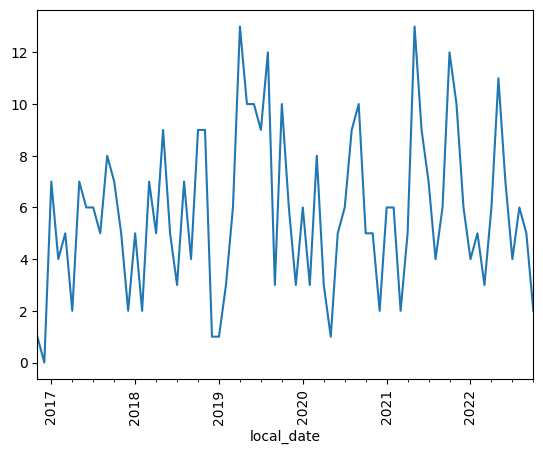

In [103]:
gps_disruption_df.resample('M', on='local_date').\
count()['Disruption Date/Time'].plot(rot=90)


## Analyse disruptions by location

In [104]:
gps_disruption_df['location_clean']=gps_disruption_df['Location'].\
apply(lambda x:x.split(',')[-1].strip().upper().replace('WASHINGTON DC','DC').split()[0])
gps_disruption_df['location_clean_group_len']=gps_disruption_df['location_clean']\
.apply(lambda x: len(x))
gps_disruption_df['location_clean2']=gps_disruption_df['Location'].\
apply(lambda x:x.split(',')[-1].strip().upper())

In [105]:
gps_disruption_df

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,local_date,location_clean,location_clean_group_len,location_clean2
0,10/16/2022 14:13:00 CST,Independence,Automobile,USER: My mapping services are constantly searc...,Mapping Issue,10/25/2022,2022-10-16,INDEPENDENCE,12,INDEPENDENCE
1,10/06/2022 09:15:00 CST,"Dallas, TX by Southern Methodist University",Other,"USER: For several years now, on and off throug...",Insufficient Information,10/25/2022,2022-10-06,TX,2,TX BY SOUTHERN METHODIST UNIVERSITY
2,09/17/2022 13:00:00 EST,"Navy Yard, Washington DC",None,USER: Our car navigation system and our mobile...,Insufficient Information,10/25/2022,2022-09-17,DC,2,WASHINGTON DC
3,09/10/2022 09:45:00 CST,Chicago,Automobile,USER: Both my standalone gps and phone gps rep...,Insufficient Information,10/25/2022,2022-09-10,CHICAGO,7,CHICAGO
4,09/07/2022 13:15:00 EST,"I-20 near Columbia, SC",Automobile,"USER: Several times, most recently yesterday, ...",Mapping Issue,09/13/2022,2022-09-07,SC,2,SC
...,...,...,...,...,...,...,...,...,...,...
414,01/05/2017 4:35 UTC,Chile,Law Enforcement,User: There were large spikes in geozone alarm...,User Equipment,05/20/2019,2017-01-05,CHILE,5,CHILE
415,01/03/2017 11:AM CST,San Angelo Airport,Aviation,User: The GPS systems in normal mode not milit...,Unintentional Interference,05/20/2019,2017-01-03,SAN,3,SAN ANGELO AIRPORT
416,01/02/2017 3:00 EST,North Carolina - South Carolina border,Transportation,User: GPS would say when you plug in that ther...,User Equipment,05/20/2019,2017-01-02,NORTH,5,NORTH CAROLINA - SOUTH CAROLINA BORDER
417,01/01/2017 12:00 EST,"Elizabeth, NJ",Transportation,"User: My business is located in Elizabeth, NJ....",Mapping Issue,05/20/2019,2017-01-01,NJ,2,NJ


### Two letter codes, mostly US states

<AxesSubplot: ylabel='Subdivision name (en)'>

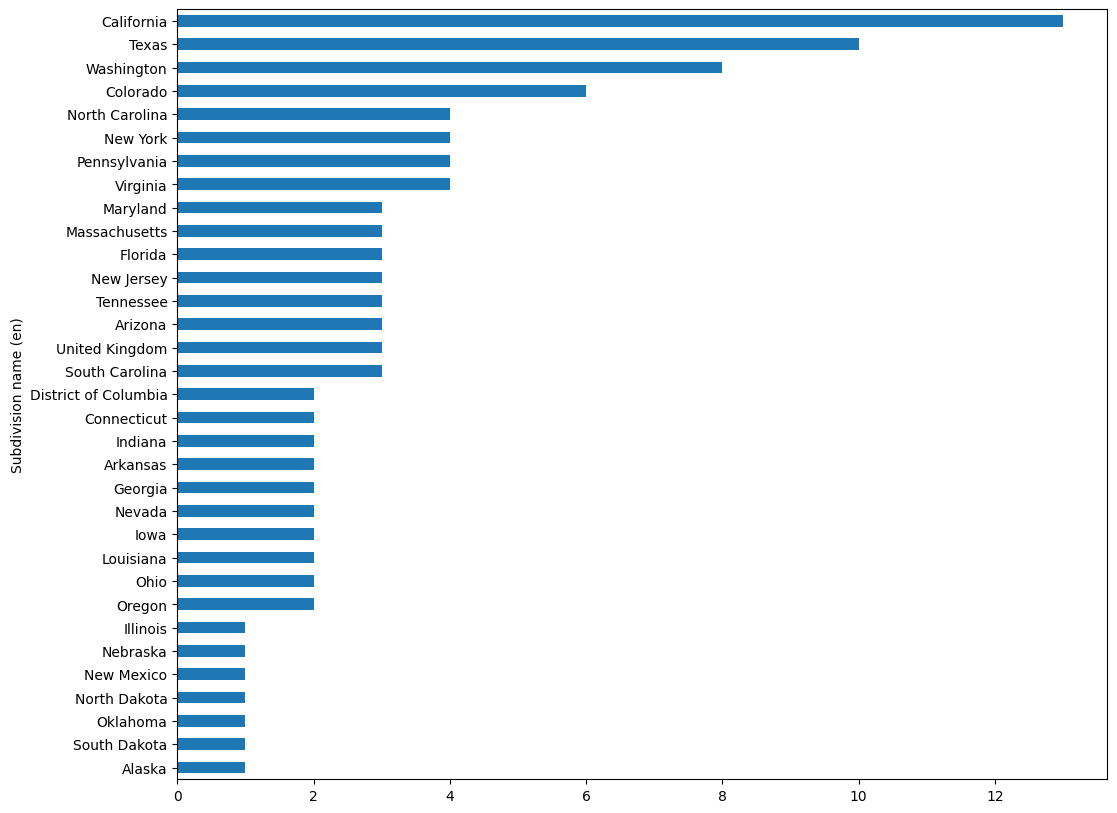

In [106]:
gps_disruption_df[gps_disruption_df['location_clean_group_len']==2].merge(two_letter_codes,how='left',left_on='location_clean',right_on='clean_state')\
.groupby('Subdivision name (en)').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,10])

In [107]:
subdivision_names=gps_disruption_df.query('location_clean_group_len==2').merge(two_letter_codes,how='left',left_on='location_clean',right_on='clean_state')\


subdivision_names[subdivision_names['Code'].isna()]#.query('math.isnan(Code)')#.query

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,local_date,location_clean,location_clean_group_len,location_clean2,Code,Subdivision name (en),Subdivision category,clean_state
14,08/15/2021 15:00 UTC,At Sea sout Sicilia Italy,Marine,"USER: Both of GPS receiver lost signal , its s...",Unknown Interference,09/29/2021,2021-08-15,AT,2,AT SEA SOUT SICILIA ITALY,NaN,NaN,NaN,NaN
16,07/28/2021 1700 (Arabic) Egypt Standard Time (...,At sea,Marine,USER: The vessel was sailing towards port said...,Unknown Interference,09/29/2021,2021-07-28,AT,2,AT SEA,NaN,NaN,NaN,NaN
17,07/02/2021 1100 EEST,NW corner of Tunisia,Marine,"User: Beginning with one unit only, GPS began ...",Unknown Interference,07/19/2021,2021-07-02,NW,2,NW CORNER OF TUNISIA,NaN,NaN,NaN,NaN
21,11/17/2020 11:15 PST,I5 north going through Seattle,Automobile,User: Getting message “unable to connect” on v...,Insufficient Information,12/15/2020,2020-11-17,I5,2,I5 NORTH GOING THROUGH SEATTLE,NaN,NaN,NaN,NaN
37,07/23/2019 1400 CET,AT SEA,Marine,USER: VESSEL NAME NEREUS ISLAND NAVCEN: The GP...,Unknown Interference,08/07/2019,2019-07-23,AT,2,AT SEA,NaN,NaN,NaN,NaN
64,05/29/2018 14:00 Near East Time,Le Port Reunion Island,Surveying,User: GPS elevation inaccuracy greater than 10...,User Equipment,05/07/2019,2018-05-29,LE,2,LE PORT REUNION ISLAND,NaN,NaN,NaN,NaN
65,05/18/2018 1430 (Arabic) Egypt Standard Time (...,35 NM North of Egyptian coast,Marine,User: GPS total signal loss on 3 occasions: 17...,Unknown Interference,05/07/2019,2018-05-18,35,2,35 NM NORTH OF EGYPTIAN COAST,NaN,NaN,NaN,NaN


In [108]:
gps_disruption_df.query('location_clean_group_len==2')['location_clean'].unique()

array(['TX', 'DC', 'SC', 'CA', 'MA', 'NV', 'OR', 'AR', 'SD', 'ND', 'UK',
       'AT', 'NE', 'NW', 'VA', 'WA', 'I5', 'TN', 'NM', 'IA', 'IL', 'CO',
       'FL', 'CT', 'MD', 'AZ', 'NC', 'IN', 'NY', 'OH', 'LE', '35', 'PA',
       'AK', 'GA', 'NJ', 'OK', 'LA'], dtype=object)

### Mostly countries, but needs cleaning

In [109]:
disruptions_by_location=gps_disruption_df[gps_disruption_df['location_clean_group_len']!=2].groupby('location_clean2').count()['Disruption Date/Time']


In [110]:
disruptions_by_location[disruptions_by_location>1].sort_values(ascending=False)#.plot(kind='barh')

location_clean2
EGYPT                     23
LIMASSOL                   9
CYPRUS                     6
ITALY                      6
BRAZIL                     5
CHINA                      4
LEBANON                    4
FLORIDA                    4
GLOBAL                     4
ISRAEL                     3
GREECE                     3
LIBYA                      3
SAUDI ARABIA               3
SPAIN                      3
GERMANY                    3
EAST OF MALTA              3
CALIFORNIA                 3
SUEZ CANAL                 2
NEW YORK                   2
TEXAS                      2
PRC                        2
TURKEY                     2
UNITED STATES              2
OREGON                     2
ALABAMA                    2
MEDITERRANEAN SEA          2
ISTANBUL                   2
ALASKA                     2
IRAN                       2
INDIA                      2
FINLAND                    2
EASTERN MEDITERRANEAN      2
EAST MEDITERRANEAN SEA     2
WORLDWIDE                  

<AxesSubplot: ylabel='location_clean2'>

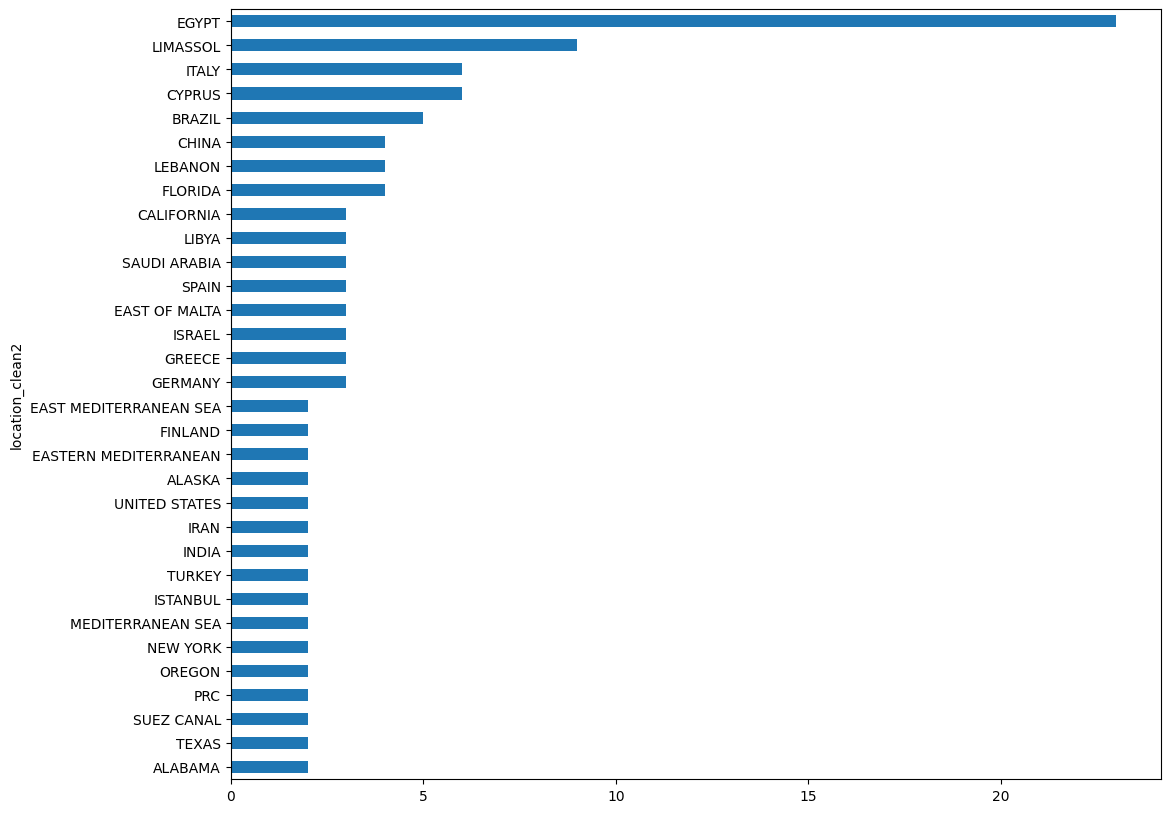

In [111]:
#def group_locations(string_x):
#    if string_x==''

disruptions_by_location[disruptions_by_location>1 ].drop(['WORLDWIDE','GLOBAL']).sort_values()\
.plot(kind='barh',figsize=[12,10])

In [112]:
gps_disruption_df.query('Location in ("Worldwide","Global","At sea")')[['local_date','Location','Description','Cause']]

,local_date,Location,Description,Cause
91,2021-07-28,At sea,USER: The vessel was sailing towards port said...,Unknown Interference
138,2021-01-16,Global,CNES has detected a repetition of IODE for PRN...,IODC_10-Bit
169,2020-08-04,Global,User: CNES (Centre National d Etudes Spatiales...,ICD_Violation
195,2020-02-12,Worldwide,"User: In February 2020 (Feb 12th, 13th, 15th a...",ICD_Violation
286,2019-02-01,Global,User: Thanks to Navigation and Timing Monitori...,None
356,2017-11-30,Global,User: GPS PRN22 orbit error started to wander ...,User Equipment
372,2017-09-20,Worldwide,User: It appears that the Subframe-2 IODC mess...,User Equipment


In [122]:
for description_str in gps_disruption_df.query('location_clean2=="UNITED STATES"')['Description']:
    print(description_str)

At roughly 8:45 PM CST lost GPS Sync to various cell sites around the US. The common GPS is trend is dual cones feeding sync to UMTS and LTE technologies. To mitigate the issue Field Technicians have removed one of the GPS cones and have a master sync from LTE feeding UMTS. There was no back office or architectural changes to our network during this time that would have caused this failure. We are curious if there were any changes made in preparation of the GPS System rollover slated for tomorrow April 6th that may have affected the base stations to lose sync. NAVCEN: The U.S. Air Force points to Interface Specification IS-GPS-200, paragraph 20.3.3.5.2.2, Almanac Reference Time, which states: "The almanac reference time, t(oa), is some some multiple of 2(12) seconds occurring approximately 70 hours after the first valid transmission time for this almanac data set (reference 20.3.4.5). The almanac is updated often enough to ensure that GPS time, t, shall differ from t(oa) by less than 3

In [113]:
gps_disruption_df\
.query('location_clean2 in ("MEDITERRANEAN SEA","EASTERN MEDITERRANEAN","EAST MEDITERRANEAN SEA")')\
[['Location','Description']]

,Location,Description
110,East Mediterranean Sea,User indicated an intermittent problem that wa...
120,Eastern Mediterranean,USER: roughly 12 hours of gps spoofing upon de...
123,East Mediterranean Sea,Lost GPS signal for six-minutes from 1620 GMT ...
124,Eastern Mediterranean,"GPS jamming begins, affecting both GPS units. ..."
152,Mediterranean Sea,User: Additional vessel in area were experienc...
154,Mediterranean Sea,User: Intermittent GPS signal beginning at 013...


In [114]:
for description_str in gps_disruption_df.query('location_clean2 in ("MEDITERRANEAN SEA","EASTERN MEDITERRANEAN","EAST MEDITERRANEAN SEA")')\
['Description']:
    print(description_str)

User indicated an intermittent problem that was otherwise unspecified. NAVCEN: The GPS Operations Center reviewed the GPS Constellation and Control Segment, there are no known anomalies that might affect GPS signal integrity at the time and vicinity of the reported problem. Space weather was reviewed and found unlikely to have impacted GPS performance. There were no authorized GPS tests in the area. No correlating reports from interagency partners. The report of interference is similar to that outlined by U.S. Maritime Administration in Maritime Advisory 2021-004-Various GPS Interference. User encouraged to report the issue to the nearest communication authority.
USER: roughly 12 hours of gps spoofing upon departure from port Said Egypt. GPS signal rapidly shifted numerous times, position 6-8 miles off. Position dropped for 90 percent of the 12 hours. GPS aboard connected to ECDIS, RADAR,AIS, GYRO repeater panel, GMDSS suite. NAVCEN: The GPS Operations Center reviewed the GPS Constella

### Rare locations

In [115]:
disruptions_by_location[disruptions_by_location==1 ]\
#.plot(kind='barh',figsize=[12,10])
#.drop(['AK','SD','OK','NM','DC','ND'])

location_clean2
034 - 48.1E                          1
100NM OFF PORT SAID                  1
230 NM OF THE COAST OF LIBYA         1
500 MILES FROM NE COAST OF BRAZIL    1
70NM EAST OF MALTA                   1
                                    ..
WESTERN AUSTRALIA                    1
WESTERN NORTH OF IRAQ                1
XANTHI                               1
YEMEN                                1
ХАРЬКОВ                              1
Name: Disruption Date/Time, Length: 185, dtype: int64

### quantify scale of each subgroup

In [116]:
gps_disruption_df.query('location_clean_group_len==2')['location_clean'].nunique()

38

In [117]:
disruptions_by_location[disruptions_by_location>1 ].count()

34

In [118]:
disruptions_by_location[disruptions_by_location==1 ].count()

185